In [1]:
import pandas as pd
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
users_df = pd.read_csv('users.csv')
print(movies_df.shape, ratings_df.shape, users_df.shape)

(4, 5) (20, 6) (4, 5)


In [2]:
movies_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   movie_id      4 non-null      str  
 1   title         4 non-null      str  
 2   genre         4 non-null      str  
 3   release_year  4 non-null      int64
 4   is_available  4 non-null      int64
dtypes: int64(2), str(3)
memory usage: 292.0 bytes


In [3]:
ratings_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rating_id      20 non-null     str    
 1   user_id        20 non-null     str    
 2   movie_id       20 non-null     str    
 3   rated_at       20 non-null     str    
 4   rating         19 non-null     float64
 5   review_status  20 non-null     str    
dtypes: float64(1), str(5)
memory usage: 1.1 KB


In [4]:
users_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   user_id      4 non-null      str  
 1   user_name    4 non-null      str  
 2   age          4 non-null      int64
 3   city         4 non-null      str  
 4   signup_date  4 non-null      str  
dtypes: int64(1), str(4)
memory usage: 292.0 bytes


In [6]:
import pandas as pd
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
users_df = pd.read_csv('users.csv')
print(f"users: {users_df.shape}")
print(f"movies: {movies_df.shape}")
print(f"ratings: {ratings_df.shape}")
print(ratings_df.head(2))

users: (4, 5)
movies: (4, 5)
ratings: (20, 6)
  rating_id user_id movie_id             rated_at  rating review_status
0     RT001    U001     M003  2026-01-01 20:00:00     4.0            OK
1     RT002    U002     M003  2026-01-01 20:00:00     5.0            OK


In [10]:
import pandas as pd
drop_cnt = ratings_df.duplicated(subset=['user_id', 'movie_id', 'rated_at']).sum()
print(f"dup_cnt: {drop_cnt}")
ratings_dup = ratings_df.drop_duplicates(subset=['user_id', 'movie_id', 'rated_at'], keep="first")
ratings_dup["rating_num"]= pd.to_numeric(ratings_dup["rating"], errors='coerce')
df_full = ratings_dup.merge(movies_df,on= "movie_id", how="left").merge(users_df, on="user_id", how="left")
df_clean = df_full[(df_full["is_available"]==1) & (df_full["review_status"].isin(["OK","SUSPECT"]))&(df_full["rating_num"].notna())]
print(f"rows: {df_clean.shape[0]}")

dup_cnt: 1
rows: 16


In [17]:
import pandas as pd
summary = df_clean.groupby(["city","genre"]).agg(rating_cnt= ("rating_num","count"), avg_rating=("rating_num","mean")).reset_index()
summary["avg_rating"] = summary["avg_rating"].round(1)
summary.sort_values(by=["city","genre"], ascending=[True, True], inplace=True)
summary

,city,genre,rating_cnt,avg_rating
0,BUSAN,Comedy,3,4.3
1,BUSAN,Romance,1,3.0
2,BUSAN,Sci-Fi,1,2.0
3,INCHEON,Comedy,1,5.0
4,INCHEON,Sci-Fi,2,4.5
5,SEOUL,Comedy,4,3.5
6,SEOUL,Romance,2,3.5
7,SEOUL,Sci-Fi,2,4.5


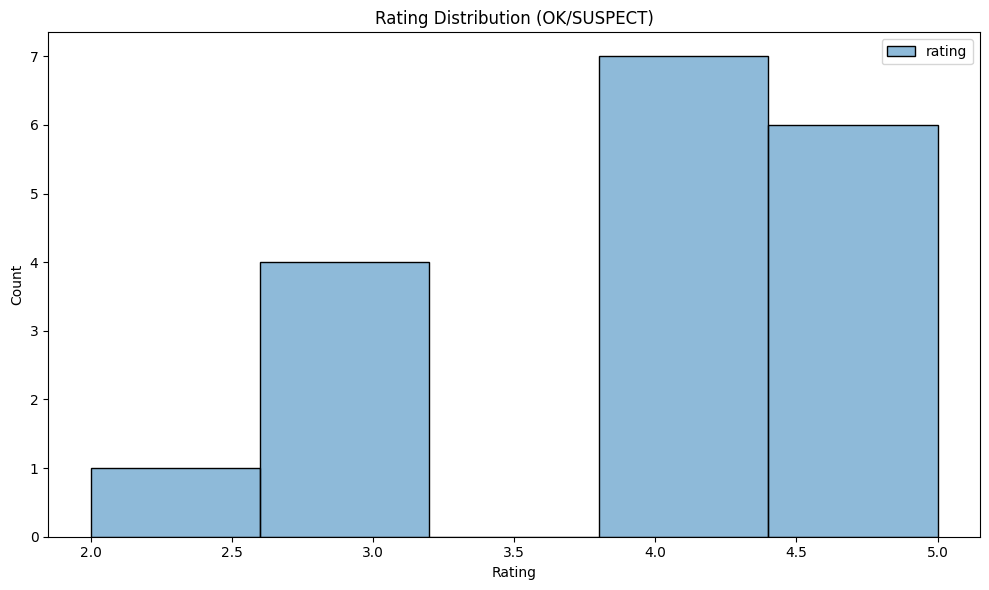

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ratings = pd.read_csv("ratings.csv", parse_dates=["rated_at"])
df_plot = ratings[(ratings["review_status"].isin(["OK","SUSPECT"]))&(ratings["rating"].notna())]
plt.figure(figsize=(10,6))
sns.histplot(df_plot, bins = 5)
plt.title("Rating Distribution (OK/SUSPECT)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

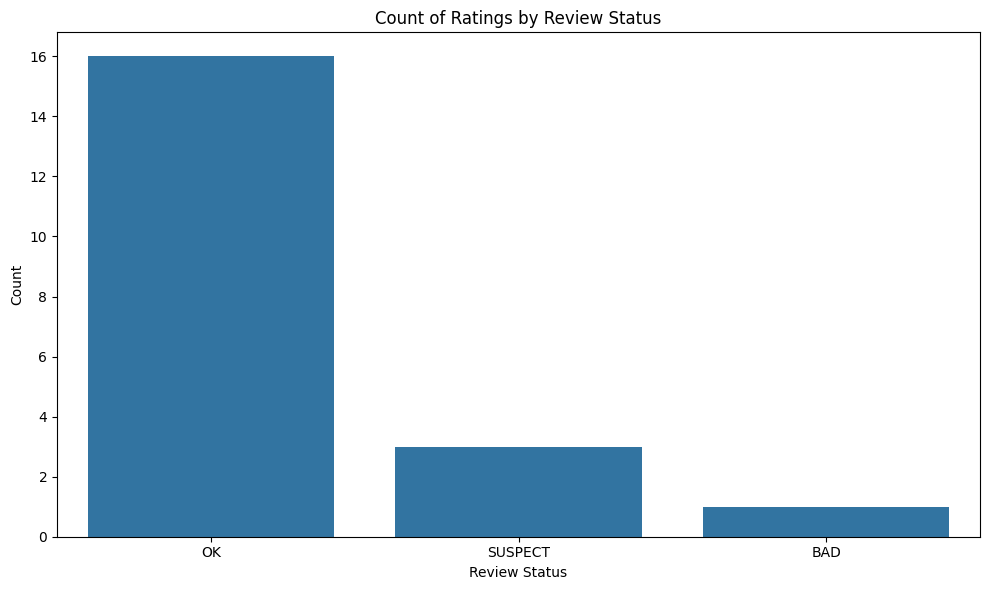

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ratings = pd.read_csv("ratings.csv", parse_dates=["rated_at"])
plt.figure(figsize=(10,6))
sns.countplot(ratings, x="review_status", order= ["OK", "SUSPECT","BAD"])
plt.title("Count of Ratings by Review Status")
plt.xlabel("Review Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()